# Assignment 3

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

#special packages
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
from sklearn import neighbors
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


#### Problem 1: Read the Data
Description: Read in the data, use a delimiter to put data in seperate columns 
Import special packages to run regression 

In [2]:
clinton = pd.read_csv('http://www.stat.ufl.edu/~winner/data/clinton1.dat', delimiter='\s\s+',\
                     names=['County_Name', 'Percent_Voting', 'Median_Age','Mean_Savings','PerCapita_Income', \
'Percent_Poverty','Percent_Veterans', 'Percent_Female', 'Population_Density','Percent_NursingHome', 'Crime_Index'], engine='python')

clinton[:10]



,County_Name,Percent_Voting,Median_Age,Mean_Savings,PerCapita_Income,Percent_Poverty,Percent_Veterans,Percent_Female,Population_Density,Percent_NursingHome,Crime_Index
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141
5,"Butler, AL",47.43,33.5,75887,12015,27.1,9.48,53.25,28.1,7.98,266
6,"Calhoun, AL",38.44,32.7,76073,15162,18.0,11.95,51.66,190.8,4.81,560
7,"Chambers, AL",45.36,34.8,40498,13887,18.8,10.52,52.77,62.1,6.15,218
8,"Cherokee, AL",53.61,36.3,56386,13936,15.4,9.29,50.82,35.8,5.61,51
9,"Chilton, AL",34.19,34.0,52230,14036,18.6,9.48,51.41,47.8,3.58,296


#### Problem 2: Predict Percent Voting on all regressors
Description: set up dmatrices, set up the model then fit it to find the p values. Identify 2 worst pvalues (highest pvalues)

The variables 'Median_Age' and 'Crime_Index' have the worst pvalues 

In [3]:
#set up dmatrices
y, X = dmatrices('Percent_Voting ~ Median_Age + Mean_Savings + PerCapita_Income + Percent_Poverty + \
Percent_Veterans + Percent_Female + Population_Density + Percent_NursingHome + Crime_Index', data = clinton, \
                          return_type='dataframe')
#set up model
model = sm.OLS(y, X)

#fit model
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:         Percent_Voting   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     145.4
Date:                Mon, 18 Apr 2016   Prob (F-statistic):          4.12e-224
Time:                        12:33:15   Log-Likelihood:                -9576.0
No. Observations:                2704   AIC:                         1.917e+04
Df Residuals:                    2694   BIC:                         1.923e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept             -38.3094    

#### Problem 3: Formula Creating Function
Description: takes in a list of regressors. Creates a string called formula
that contains "percentVoting ~". Iterates through the regressor list. Adds each
regressor to the string with the appropriate punctuation. Returns the string

In [4]:
def formula(regressorList):
    # create string with the beginning of formula
    formula = "Percent_Voting ~"
    # iterate through regressor list
    for i in regressorList:
        # if it isn't the first regresssor added, add a + to the string and the regressor
        if formula[-1] != "~":
            formula = formula + " + " + i
        # if the last item in the list is a ~ (first regressor added)
        # add a space and the regressor
        else:
            formula = formula + " " + i
    return formula

print formula(["Median_Age","Mean_Savings"])
    

Percent_Voting ~ Median_Age + Mean_Savings


#### Problem 4: R-Squared Computation Function
Description: takes in a list of regressors. uses the formula function to create a regression formula. creates dmatrices and sets up the model for given formula. returns the rsquared for that formula

In [5]:
def rsquared(regressorList):
    # create regression formula with the function
    regressionFormula = formula(regressorList)
    #set up dmatrices
    y, X = dmatrices(regressionFormula, data = clinton, return_type='dataframe')
    #set up model
    model = sm.OLS(y, X)

    #fit model
    result = model.fit()

    return result.rsquared

allRegressors = ["Median_Age", "Mean_Savings", "PerCapita_Income", "Percent_Poverty", \
"Percent_Veterans", "Percent_Female", "Population_Density", "Percent_NursingHome", "Crime_Index"]

print rsquared(allRegressors)
    

0.326900387252


#### Problem 5: Find the best regressor
Description: I set the R-squared as the best R2. The current set is also saved as the best set. As the for loop append each regressor that's not in the current list to the end of the currently list as the test set, the new R-squared will be tested. If the new R2 is greater than the stored best_R2, the best_R2 will be replaced and the last item in the test list will be the best regressor.

In [6]:
def best_next_regressor(current_regressor_list, all_regressors_list):
    #Initiate the two variable for storing result
    best_R2 = rsquared(current_regressor_list)
    best_set = current_regressor_list
    
    #run through the loop to examine the R2 for each new combination
    for i in all_regressors_list:
        
        #make sure the regressor is not in the current list
        if i not in current_regressor_list:
            #Make the regressor an list item
            regressor = []
            regressor.append(i)
            #combine the regressor with the current list to make the new list
            newSet = current_regressor_list + regressor
            newR2 = rsquared(newSet)
            #Test if the R2 of the new set is better than the best R2 on record
            if newR2 >= best_R2:
                #Update the record
                best_R2 = newR2
                best_set = newSet
                best_regressor = newSet[-1]
    return best_R2, best_regressor

#Test Set
current_regressor_list = ['Median_Age', 'PerCapita_Income', 'Percent_Poverty', 'Percent_Veterans', \
                 'Percent_Female', 'Population_Density', 'Percent_NursingHome']
all_regressors_list = allRegressors

print 'Original R-Squared: ', rsquared(current_regressor_list)
print 'Best Next Regressor: ', best_next_regressor(current_regressor_list, all_regressors_list)

Original R-Squared:  0.317003721453
Best Next Regressor:  (0.32636121791160388, 'Mean_Savings')


#### Problem 6: Pick the K-best regressors
Description: Find the first best R-squared and then use the best_next_regressor function to find the next k-1 best regessors. K is the number required by input. We start with computing the single best regressor because the previous next_best_regressor function does not support current regressor list to be empty. We could've update the rsquared function to solve it. In this case, it does not affect the result.

In [7]:
def best_regressors(num_regressors, all_regressors_list):
    #Set the initial best R2 to 0
    bestR2 = 0
    bestReg = ''
    #Run through the list to find the number 1 best regressor
    for x in all_regressors_list:
    	x = [x]
        xR2 = rsquared(x) 
    	if xR2 >= bestR2:
    		bestR2 = xR2
    		bestReg = x
            
    #Update the current list of regressors and current best R2
    listRegressors = bestReg
    listR2 = [bestR2]
    for i in range(num_regressors-1):
    	listRegressors.append(best_next_regressor(listRegressors, all_regressors_list)[1])
    	listR2.append(best_next_regressor(listRegressors, all_regressors_list)[0]) 
        
    #return the result as a tuple
    return listRegressors, listR2

#Test Set
num_regressors = 5
all_regressors_list = allRegressors
print "Best %d th regressors by order is "%(num_regressors), best_regressors(num_regressors, all_regressors_list)[0]
print 'Best R-Squared in order is ', best_regressors(num_regressors, all_regressors_list)[1]

Best 5 th regressors by order is  ['Percent_Poverty', 'Population_Density', 'Percent_Female', 'Mean_Savings', 'Percent_Veterans']
Best R-Squared in order is  [0.25103851961631962, 0.30914506632485794, 0.31924118502370513, 0.32299256887291694, 0.32485127138693681]


#### Problem 7: Order all regressors in the best order
Description: Set the num_regressor equal to the number of all regressors and fund the best regressors function


In [8]:
num_regressors = len(all_regressors_list)
#to compensate the problem of cannot compute R-squared with empty list, we compute the n-1 best regressor 
bestList = best_regressors(num_regressors-1, all_regressors_list)[0]
#Whichever regressor is not in the best regressor list, is the lest best_regressor
for i in all_regressors_list:
    if i not in bestList:
        #add the lest best_regressor to the end of the list
        bestList.append(i)
print 'The order of the best regressors is: ', bestList

The order of the best regressors is:  ['Percent_Poverty', 'Population_Density', 'Percent_Female', 'Mean_Savings', 'Percent_Veterans', 'Percent_NursingHome', 'PerCapita_Income', 'Crime_Index', 'Median_Age']


#### Problem 8: Plot the R-squared values as regressors are added in the best order.
Description: We set the number of regressors as x axis and the R-squared as the y axis and ploted the trend.

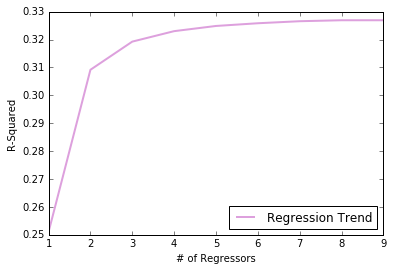

In [9]:
num_regressors = len(all_regressors_list)
best = best_regressors(num_regressors-1, all_regressors_list)[1]
best.append(result.rsquared)

x = []
for z in range(num_regressors):
    x.append(z+1)
plot(x, best, color='plum', linewidth=2, label='Regression Trend')
xlabel('# of Regressors')
ylabel('R-Squared')
legend(loc ='best')

#### Problem 9: Create a classication target.
Description: A target clomn was created, with every value equal to 0.0 Then a mask was applied to those whose voting percentge exceeded 40% those records were assigned a positive 1 value

In [10]:
#creates a column that will contain the targets, is intialized with all zeros
clinton['Target'] = 0.0
#create the mask to identify which of the records is a postive target or a 1
mask = clinton['Percent_Voting'] > 40.0 
clinton.ix[mask,'Target'] = 1.0
clinton[:5]




,County_Name,Percent_Voting,Median_Age,Mean_Savings,PerCapita_Income,Percent_Poverty,Percent_Veterans,Percent_Female,Population_Density,Percent_NursingHome,Crime_Index,Target
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457,0.0
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282,0.0
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47,1.0
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185,0.0
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141,1.0


#### Problem 10: Create training and test sets.
Description: first we created the d matrices. then transferred those values from datatales to lists. then we split up those lists into training and test sets

In [11]:
#create the matrices
Y2,X2 = dmatrices('Target~ 0+Percent_Poverty+Population_Density',clinton, return_type="dataframe")
#the code above returns type dataframe, so we need to make them lists, so we can use them
y2_list = Y2['Target'].values
y2 = y2_list
x2 = X2.values 

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=.3,random_state=1)





#### Problem 11: Accuracy of classication
Description: Create loop to go through list of the number of nearest neighbors to be tested print results for each  nearest neighbors numbered used. 

In [12]:
# list of nearest neighbors numbers to use
n_neighbors = [1, 3, 5, 10, 20, 50, 100, 1000]
    
#loop to go through list
for i in n_neighbors:
        
        #seting up the classifier
        model_2 = neighbors.KNeighborsClassifier(n_neighbors=i, weights='uniform', p=2)
        #fitting the model to the training data
        model_2.fit(x2_train,y2_train)


        ####

        #x2_train.iloc[0:5]
        #code above does not work becase i cant update canopy to 2.7.11
        print "n-neighbors =", i
        prediction_on_training = model_2.predict(x2_train)
        print 'Train Accuracy', metrics.accuracy_score(y2_train, prediction_on_training)


        prediction_on_test = model_2.predict(x2_test)
        print 'Test Accuracy', metrics.accuracy_score(y2_test, prediction_on_test)
        print '____________________________'

n-neighbors = 1
Train Accuracy 0.997885835095
Test Accuracy 0.600985221675
____________________________
n-neighbors = 3
Train Accuracy 0.788583509514
Test Accuracy 0.635467980296
____________________________
n-neighbors = 5
Train Accuracy 0.749471458774
Test Accuracy 0.630541871921
____________________________
n-neighbors = 10
Train Accuracy 0.720930232558
Test Accuracy 0.646551724138
____________________________
n-neighbors = 20
Train Accuracy 0.690803382664
Test Accuracy 0.658866995074
____________________________
n-neighbors = 50
Train Accuracy 0.684460887949
Test Accuracy 0.662561576355
____________________________
n-neighbors = 100
Train Accuracy 0.678118393235
Test Accuracy 0.663793103448
____________________________
n-neighbors = 1000
Train Accuracy 0.566596194503
Test Accuracy 0.570197044335
____________________________


#### Problem 12: Plots and Reasons
Description: we plotted the data in order to show the positive and negative cases. We used a color scale based on the target list known as y2. We used a color map of blue white and red, but since only classes are available, only blue and red will show. We labeled the axis, and constrained the x and y axis to 55 and 33, respectively. Red represents those counties with less than 40% voting

(0, 33000)

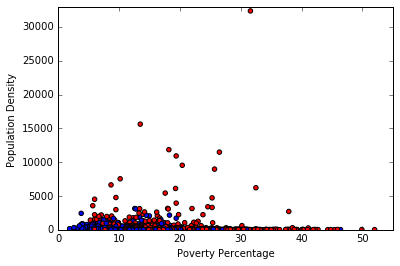

In [13]:
#plot the data, just to visualize it, not neccessary just wanted to see how it looks
sc = scatter(clinton['Percent_Poverty'],clinton['Population_Density'], c=y2, cmap= 'bwr')
xlabel('Poverty Percentage')
ylabel('Population Density ')
plt.xlim(0,55)
plt.ylim(0,33000)
